In [14]:
#Imports
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Loading Data

In [2]:
# File used during Part 2.5 (Basic EDA) since it already filtered out
# movies that have a revenue and budget > 0
df = pd.read_csv('Data/tmdb_results_combined.csv.gz')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.108,1956.0,PG
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R
2,tt0120630,0.0,/sPAwM8WxMdXNlqeP4F9DMe9LYoY.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.726,4106.0,G
3,tt0120753,0.0,NaN,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.915,254.0,R
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.108,5448.0,PG-13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5168 non-null   object 
 1   adult                  5168 non-null   float64
 2   backdrop_path          4953 non-null   object 
 3   belongs_to_collection  1141 non-null   object 
 4   budget                 5168 non-null   float64
 5   genres                 5168 non-null   object 
 6   homepage               2452 non-null   object 
 7   id                     5168 non-null   float64
 8   original_language      5168 non-null   object 
 9   original_title         5168 non-null   object 
 10  overview               5160 non-null   object 
 11  popularity             5168 non-null   float64
 12  poster_path            5134 non-null   object 
 13  production_companies   5168 non-null   object 
 14  production_countries   5168 non-null   object 
 15  rele

In [4]:
# dropping all rows with nans to avoid skewing the data during hypothesis testing
df = df.dropna(subset = ['certification'])

# Answering Stakeholder Questions with Hypothesis Testing

## Q1: Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

### Hypotheses

- Null Hypothesis: Different MPAA ratings all generate the same amount of revenue on average.

- Alternative Hypothesis: Different MPAA ratings generate revenue at significantly different amounts.

### Separating Our Groups

In [5]:
#dropping NR and NC-17
values = ['NR', 'NC-17']
df = df[df.certification.isin(values) == False]

In [6]:
#Creating a group dictionary
groups = {}
# Looping through all unique categories
for i in df['certification'].unique():
    # Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'PG-13'])

### Checking Assumptions

#### Outliers

- Unsure how to loop through to remove outliers

#### Normality

In [7]:
## Running normal test on each group and confirming there are >15 in each group
norm_results = {}
for i, data in groups.items():
    
    ## Use stats.normaltest for samples > 20
    if len(data) >= 15:
        stat, p = stats.normaltest(data)
        
    ## Use stats.shapiro for samples < 20
    else:
        stat, p = stats.shapiro(data)
        
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,528.0,2.922066e-62,283.375970
R,1730.0,0.000000e+00,1442.690580
G,88.0,1.655291e-13,58.859259
PG-13,1454.0,4.040370e-269,1235.998108


In [8]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,528.0,2.922066e-62,283.375970,True
R,1730.0,0.000000e+00,1442.690580,True
G,88.0,1.655291e-13,58.859259,True
PG-13,1454.0,4.040370e-269,1235.998108,True


- None of the groups have a normal distribution, but since the sample sizes are all larger than 20 we can ignore this assumption.

#### Equal Variance

In [9]:
stats.levene(*groups.values())

LeveneResult(statistic=71.4033653887217, pvalue=6.418997812246123e-45)

- The groups do not have equal variance, so we will use stats.kruskal.

### Kruskal Test

In [10]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=423.8223485498064, pvalue=1.53002826449322e-91)

### Conclusion

- Since our p-value for the Kruskal test is < .05, we reject the null hypothesis and accept the alternative hypothesis that there is a significant difference in revenue generation between different MPAA ratings. To find out which specific ratings are significantly different, we will perform a Tukey pairwise comparison test.

In [15]:
## saving the values as revenue and the labels to the certification
values = df['revenue']
labels = df['certification']

## performing tukey's multiple comparison test and displaying the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,14717034.5341,0.9216,-45088324.6546,74522393.7228,False
G,PG-13,-8865563.8686,0.9784,-65885495.4502,48154367.713,False
G,R,-110356456.8848,0.0,-167116222.858,-53596690.9116,True
PG,PG-13,-23582598.4027,0.099,-49973893.625,2808696.8196,False
PG,R,-125073491.4189,0.0,-150897877.1671,-99249105.6707,True
PG-13,R,-101490893.0162,0.0,-119970354.8362,-83011431.1962,True


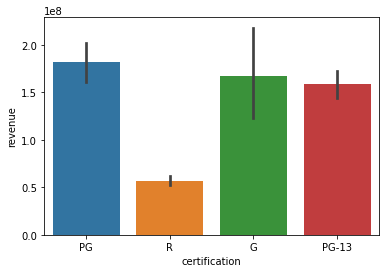

In [16]:
sns.barplot(data=df, x='certification',y='revenue');

- Based on these results, we can see that there is a significant difference between G and R rated movies, between PG and R rated movies, and between PG-13 and R rated movies. In combination with the barplot, it is clear that R rated movies generate significantly lower revenue than the rest.